<a href="https://colab.research.google.com/github/WeizmannML/course2020/blob/master/Tutorial1/Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

plt.rcParams["figure.figsize"] = (10,10)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the dataset

Lets make a dataset where $y = x + log(x) + \epsilon$, where $\epsilon$ is a random number

In [0]:
N_data = 2000

data_x = np.linspace(1.0, 10.0, N_data)[:, np.newaxis]
#data_y = data_x + 0.5*np.random.randn(N_data,1) + np.log(data_x)
data_y = data_x + 0.5*np.random.randn(N_data,1) 

In [4]:
data_x.shape, data_y.shape

((2000, 1), (2000, 1))

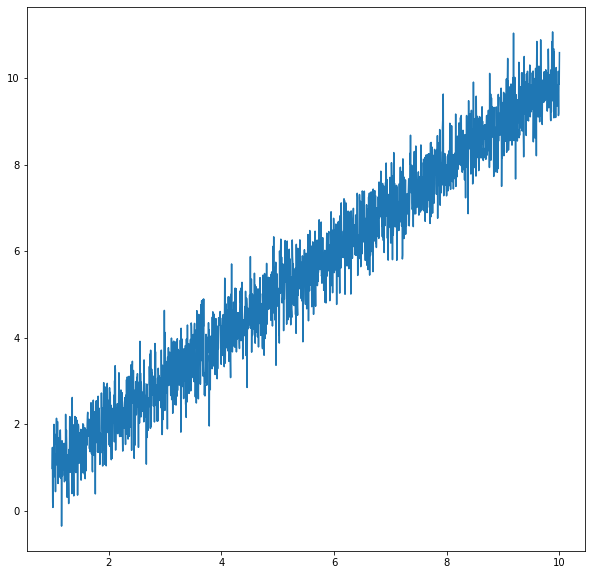

In [5]:
plt.plot( data_x.flatten(), data_y.flatten()  )

### Make a train-test split of the available dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, y_train.shape

((1600, 1), (1600, 1))

In [0]:
# --- declare the L2 distance function between target & prefiction --- #
def compute_Loss(y_tar, y_pred):

    return 0.5 * np.mean( pow((y_pred- y_tar),2) )

In [0]:
tolerance = 1e-5

In [0]:
class LinearRegression():
    def __init__(self, X, y, lr=0.001, n_iter=1500):

        self.lr = lr
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = X.shape[1]
        self.X = X
        self.y = y
        self.W = np.random.rand( self.n_features ,1 )
        self.b = np.random.rand( 1,1 )

    def fit(self): 

          for i in range(self.n_iter):

              y_pred = ( self.X ).dot( self.W)  + self.b

              loss = compute_Loss( self.y, y_pred )

              grad_weight =np.dot((y_pred-self.y).T,X_train)/self.n_samples

              grad_bias = np.mean(y_pred- self.y)

              if( abs( np.sum(grad_weight) ) < tolerance and abs(grad_bais) < tolerance ) : break

              self.w = self.W - self.lr * grad_weight.T
              self.b = self.b - self.lr * grad_bias


    def predict(self, X) : 

         y_pred = ( X ).dot( self.W)  + self.b

         return y_pred

    # def params(self) : 

    #      weight_dict = {}
    #      weight_dict['weight'] = self.W
    #      weight_dict['bias'] = self.b

    #      return weight_dict

In [0]:
#del learn

In [0]:
learn = LinearRegression(X_train, y_train, n_iter=1000)

In [0]:
learn.fit()

In [0]:
y_pred = learn.predict( X_test)

In [15]:
y_pred.shape, y_test.shape

((400, 1), (400, 1))

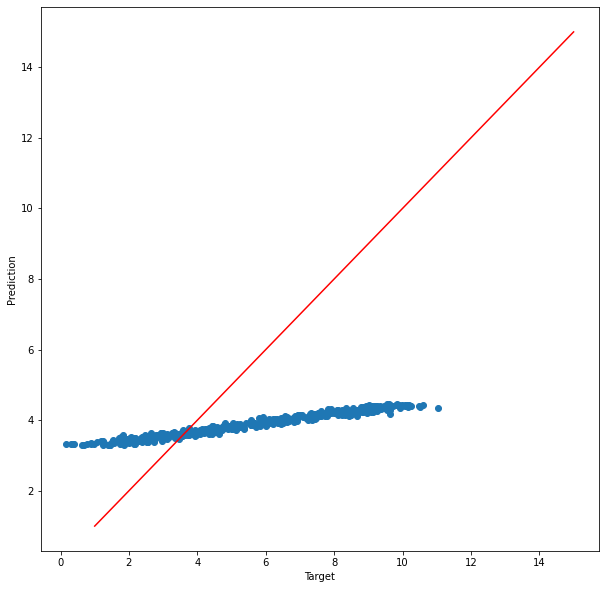

In [16]:
plt.scatter( y_test.flatten(), y_pred.flatten()  )
plt.xlabel('Target')
plt.ylabel('Prediction')

plt.plot( np.linspace(1,15, 1000), np.linspace(1,15, 1000), color='r', linewidth=1.5 )

In [17]:
learn.params()

{'bias': array([[3.14956789]]), 'weight': array([[0.13061324]])}